**LETS GROW MORE INTERNSHIP - AUGUST 2023**\
**TASK - FACIAL EXPRESSIONS RECOGNITION**\
**NINAD NILESH SUGANDHI**

**The objective of this project is to construct a deep learning model capable of precisely categorizing facial expressions into seven distinct classes: Anger, Disgust, Fear, Happiness, Sadness, Surprise, and Neutrality. Convolutional neural networks (CNNs) will be employed for model training due to their demonstrated efficacy in image classification missions. The methodology entails training a CNN model from the ground up, utilizing the FER-2013 dataset.**

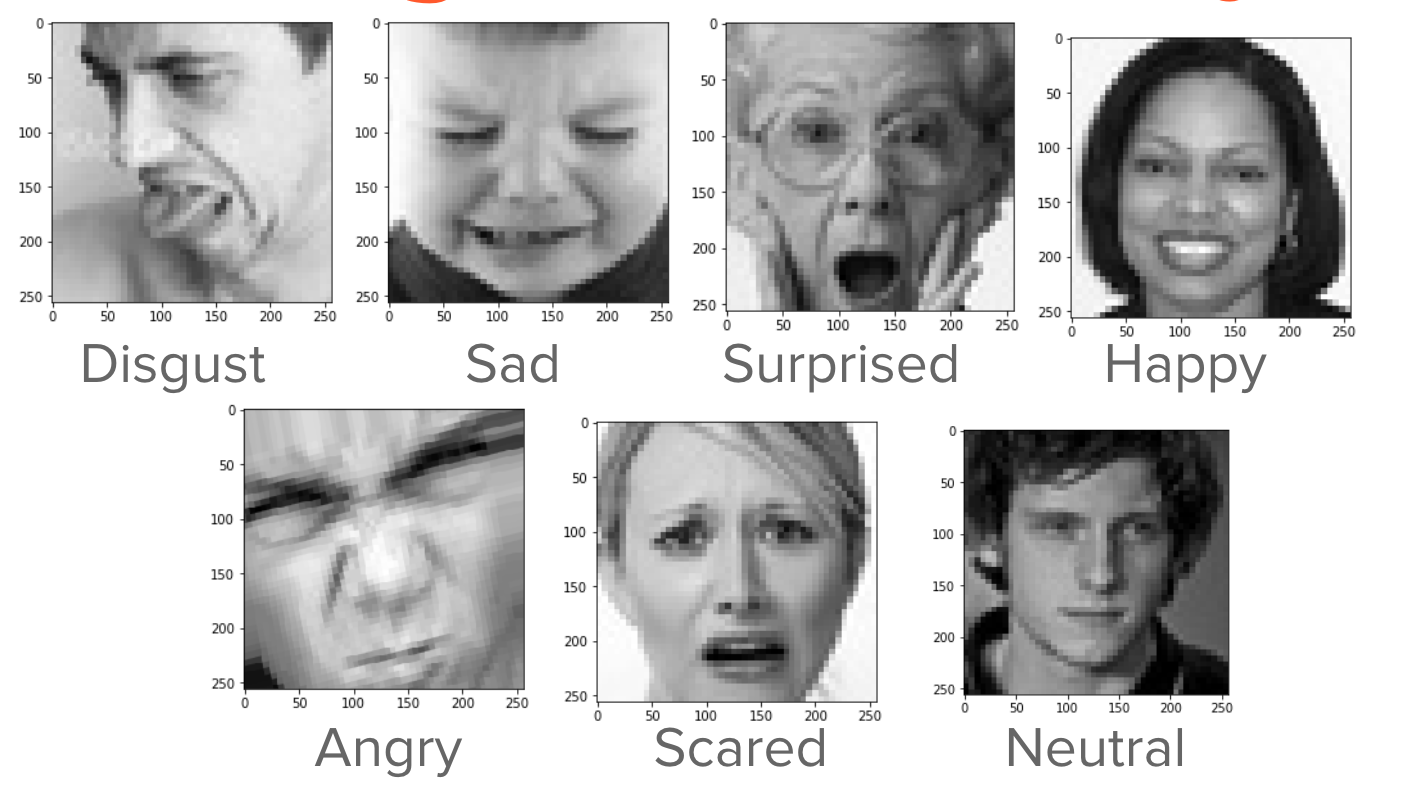

## Importing Libraries

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import os
import cv2
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPool2D, Flatten
import visualkeras
from PIL import ImageFont
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
import os

#Loading Data and Preprocessing Data

In [10]:
train_dir = "/content/drive/MyDrive/kaggle/train"
test_dir = "/content/drive/MyDrive/kaggle/test"
img_size = 48

gen_train = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, rescale = 1./255, zoom_range = 0.3, validation_split = 0.2)
train_generator = gen_train.flow_from_directory(directory = train_dir, target_size = (img_size,img_size), batch_size = 64, color_mode = "grayscale", class_mode = "categorical", subset = "training")

gen_test = ImageDataGenerator(rescale = 1./255, validation_split= 0.2)
validation_generator = gen_test.flow_from_directory( directory = test_dir, target_size = (img_size,img_size), batch_size = 64, color_mode = "grayscale", class_mode = "categorical", subset = "validation")

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [11]:
def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + '/' + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


# Data Visualization

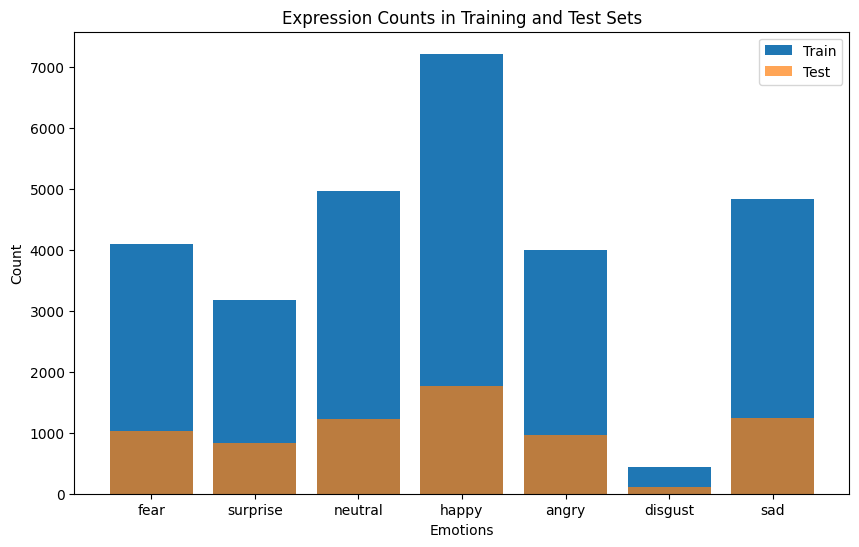

In [12]:
emotions = ['fear', 'surprise', 'neutral', 'happy', 'angry', 'disgust', 'sad']
train_counts = [4097, 3171, 4965, 7215, 3995, 436, 4830]
test_counts = [1024, 831, 1233, 1774, 958, 111, 1247]

plt.figure(figsize=(10, 6))
plt.bar(emotions, train_counts, label='Train')
plt.bar(emotions, test_counts, label='Test', alpha=0.7)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Expression Counts in Training and Test Sets')
plt.legend()
plt.show()

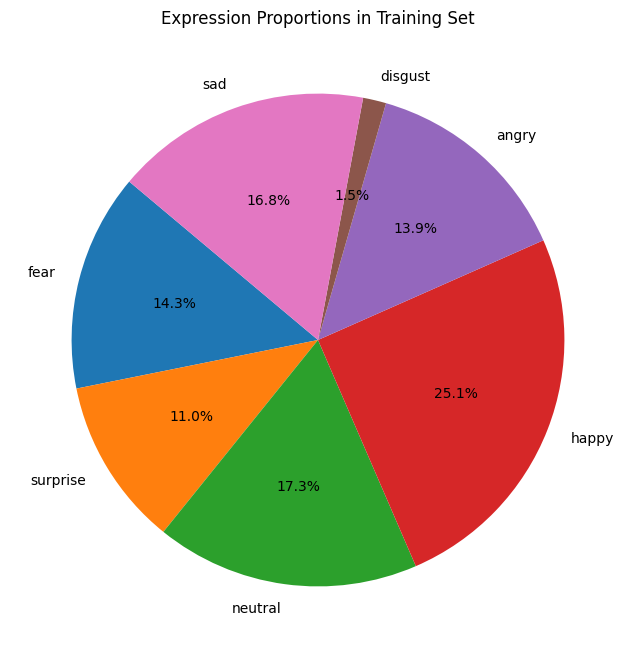

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(train_counts, labels=emotions, autopct='%1.1f%%', startangle=140)
plt.title('Expression Proportions in Training Set')
plt.show()

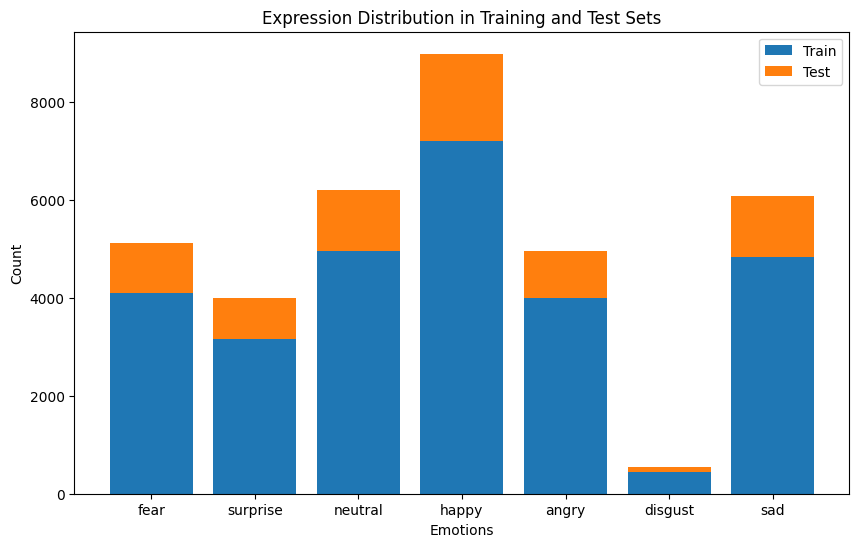

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(emotions, train_counts, label='Train')
plt.bar(emotions, test_counts, bottom=train_counts, label='Test')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Expression Distribution in Training and Test Sets')
plt.legend()
plt.show()

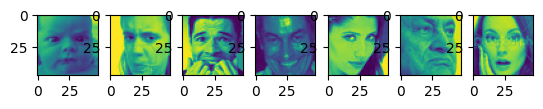

In [17]:
i = 1
for expression in os.listdir(train_dir):
    img_path = os.path.join(train_dir, expression, os.listdir(os.path.join(train_dir, expression))[1])
    img = Image.open(img_path)
    plt.subplot(1, 7, i)
    plt.imshow(img)
    i += 1

plt.show()

# Developing Sequential model with several layers

In [18]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 5
batch_size = 64
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

# Defining checkpoints for callbacks

In [19]:
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

earlystop = EarlyStopping(monitor='val_accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint_callback, reduce_lr, csv_logger]

# Visualization of Model

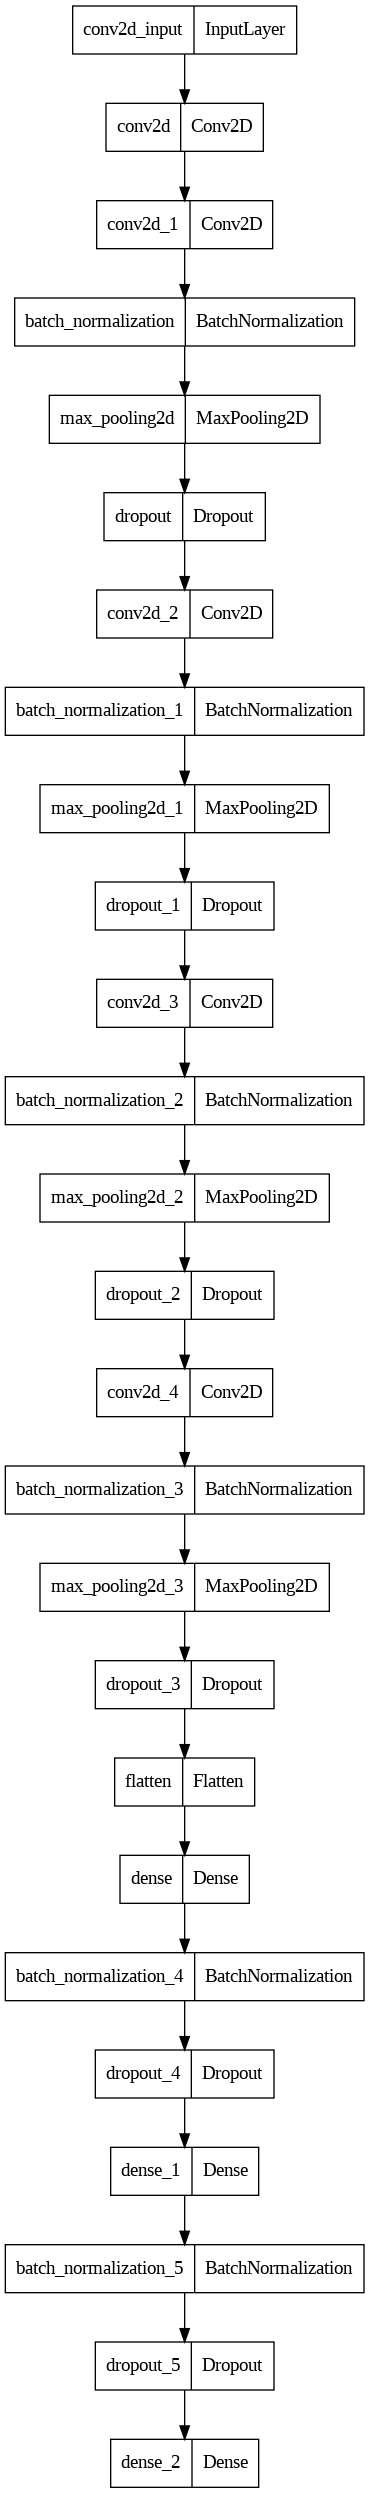

In [20]:
plot_model(model, show_layer_names=True)

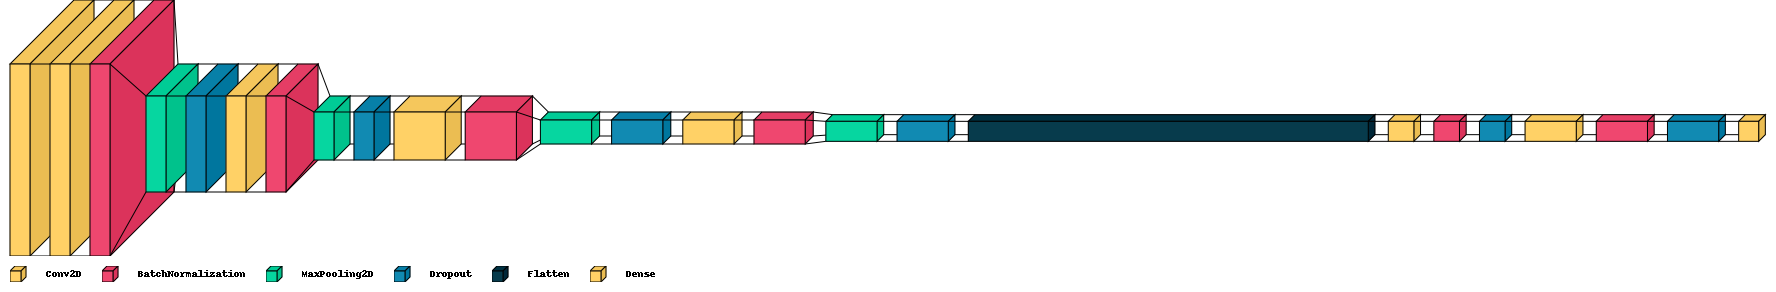

In [21]:
visualkeras.layered_view(model, legend = True, draw_volume = True, spacing = 20)

# Training the model on the Dataset

In [22]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/5
359/359 [==============================] - 4993s 14s/step - loss: 5.3659 - accuracy: 0.2102 - val_loss: 3.0123 - val_accuracy: 0.2472
Epoch 2/5
359/359 [==============================] - 1449s 4s/step - loss: 2.2673 - accuracy: 0.2582 - val_loss: 2.2360 - val_accuracy: 0.2828
Epoch 3/5
359/359 [==============================] - 1444s 4s/step - loss: 2.1864 - accuracy: 0.3167 - val_loss: 2.2147 - val_accuracy: 0.3527
Epoch 4/5
359/359 [==============================] - 1452s 4s/step - loss: 2.3061 - accuracy: 0.3696 - val_loss: 2.5770 - val_accuracy: 0.3596
Epoch 5/5
359/359 [==============================] - 1445s 4s/step - loss: 2.3454 - accuracy: 0.4201 - val_loss: 2.3140 - val_accuracy: 0.4518


# Plotting graphs of training and validation accuracy vs loss

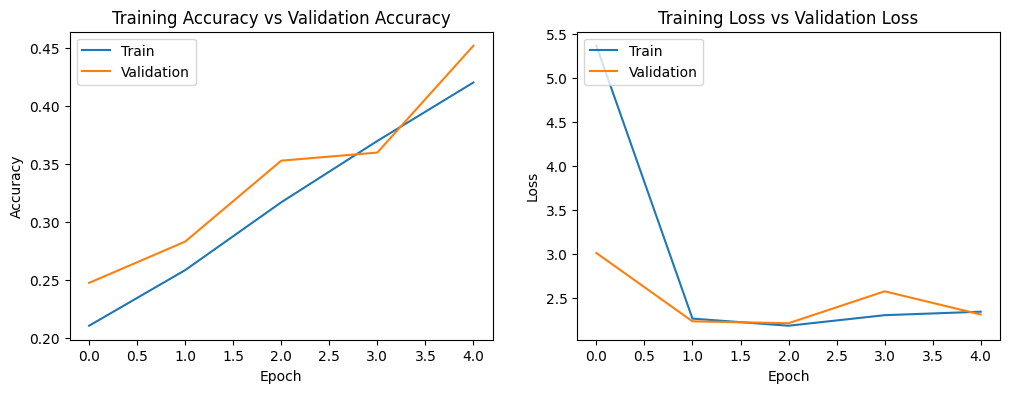

In [23]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Finding confusion matrix and plotting it

23/23 [==============================] - 20s 862ms/step


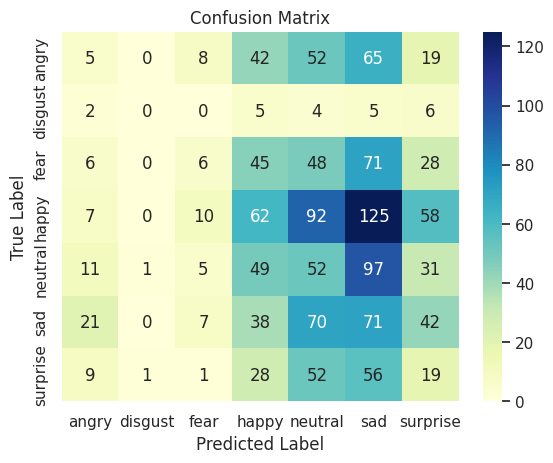

In [30]:
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Train and validation accuracy

In [25]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("Final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 19s 833ms/step - loss: 2.3140 - accuracy: 0.4518
Final train accuracy = 39.87 , validation accuracy = 45.18
